Data Loading and Initial Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter
import re
import warnings
import nltk


# NLTK 'stopwords' corpus downloaded
try:
    nltk.data.find('corpora/stopwords')
    print("NLTK 'stopwords' already downloaded.")
except LookupError:
    print("NLTK 'stopwords' not found. Downloading...")
    nltk.download('stopwords')
    print("NLTK 'stopwords' download complete.")


warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Use the specific file path
FILE_PATH = r'C:\Users\Home-User\Downloads\data\raw_analyst_ratings.csv'
try:
    df = pd.read_csv(FILE_PATH)
    print(f"Data loaded successfully. Shape: {df.shape}")
    
    # Convert 'date' to datetime object. 
    # turn unparseable dates into NaT (Not a Time)
    df['date'] = pd.to_datetime(df['date'], errors='coerce') 

    # remaining NaT values are dropped (or handled)
    df.dropna(subset=['date'], inplace=True)
    print(f"After date cleanup, data shape: {df.shape}")
    
    # Extract features
    df['publication_day'] = df['date'].dt.day_name()
    df['publication_hour'] = df['date'].dt.hour
    df['publication_date_only'] = df['date'].dt.date
    
    print("\nData Info:")
    df.info()
except FileNotFoundError:
    print(f"Error: File not found at the specified path: {FILE_PATH}. Please verify the file location.")
    exit()
    
    

NLTK 'stopwords' already downloaded.
Data loaded successfully. Shape: (1407328, 6)
After date cleanup, data shape: (55987, 6)

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 55987 entries, 0 to 1407270
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   Unnamed: 0             55987 non-null  int64                    
 1   headline               55987 non-null  object                   
 2   url                    55987 non-null  object                   
 3   publisher              55987 non-null  object                   
 4   date                   55987 non-null  datetime64[ns, UTC-04:00]
 5   stock                  55987 non-null  object                   
 6   publication_day        55987 non-null  object                   
 7   publication_hour       55987 non-null  int32                    
 8   publication_date_only  55987 non-null  object       

Descriptive Statistics


--- Headline Length Descriptive Statistics ---
count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64


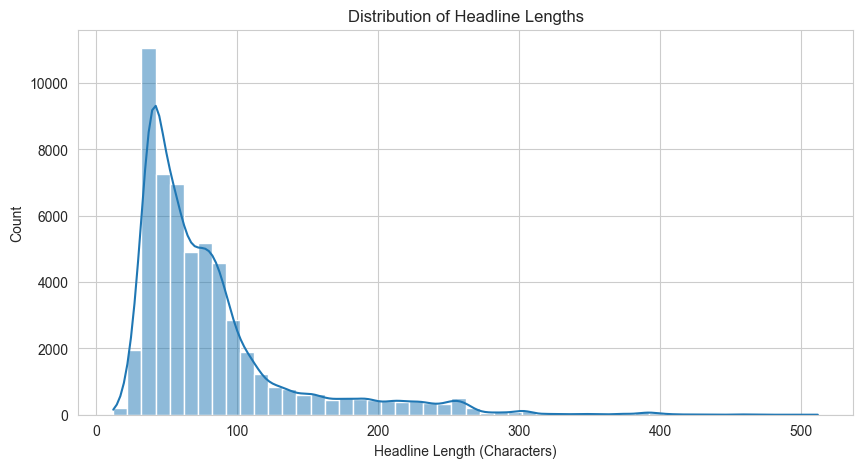

In [ ]:
## Descriptive Statistics: Headline Length
df['headline_length'] = df['headline'].apply(len)
print("\n--- Headline Length Descriptive Statistics ---")
print(df['headline_length'].describe())
# Image of histogram of text length distribution
# the plot command for the visualization
plt.figure(figsize=(10, 5))
sns.histplot(df['headline_length'], bins=50, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (Characters)')
plt.show()

Publisher Analysis


--- Top 10 Most Active Publishers ---
publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64


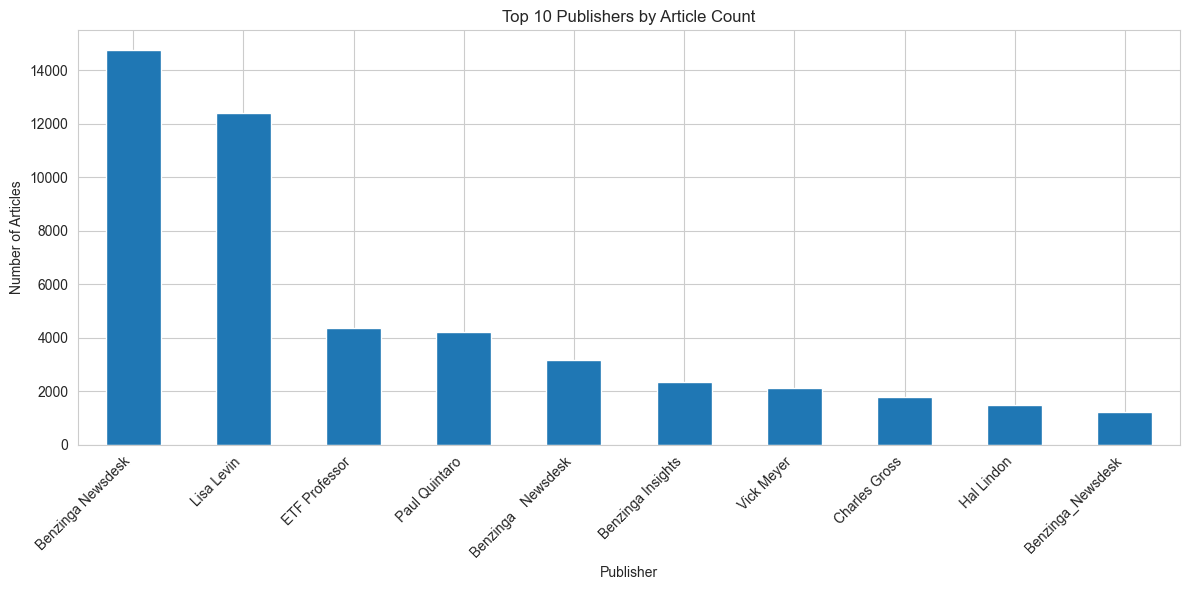

In [ ]:
## Publisher Analysis: Article Count
publisher_counts = df['publisher'].value_counts().head(10)
print("\n--- Top 10 Most Active Publishers ---")
print(publisher_counts)

# the plot command for the visualization
plt.figure(figsize=(12, 6))
publisher_counts.plot(kind='bar')
plt.title('Top 10 Publishers by Article Count')
plt.ylabel('Number of Articles')
plt.xlabel('Publisher')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Time Series Analysis

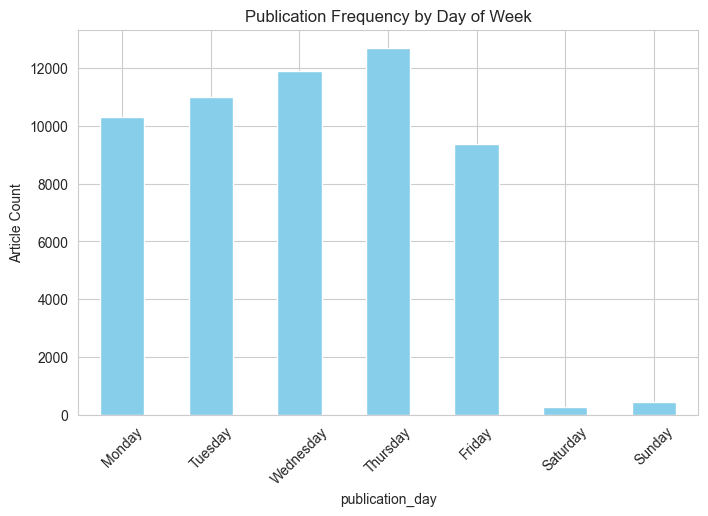

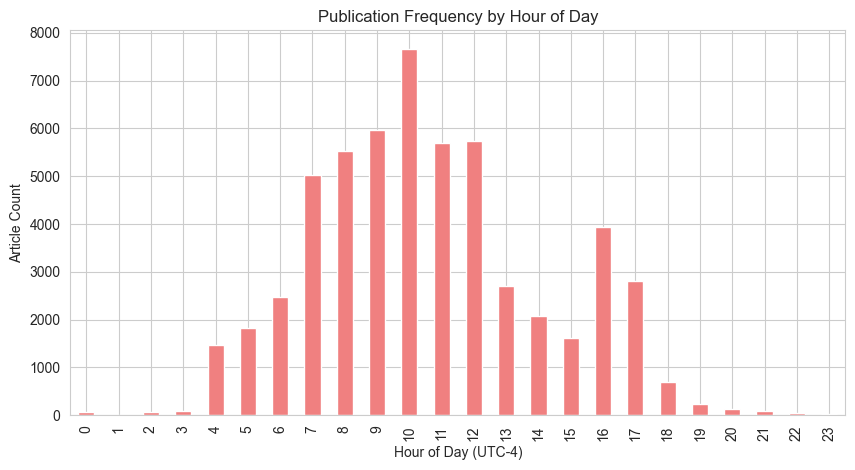

In [ ]:
## Time Series Analysis: Publication Frequency by Day and Hour
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_freq = df['publication_day'].value_counts().reindex(day_order).fillna(0)

# Day of Week
plt.figure(figsize=(8, 5))
day_freq.plot(kind='bar', color='skyblue')
plt.title('Publication Frequency by Day of Week')
plt.xticks(rotation=45)
plt.ylabel('Article Count')
plt.show()

# Hour of Day
hour_freq = df['publication_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
hour_freq.plot(kind='bar', color='lightcoral')
plt.title('Publication Frequency by Hour of Day')
plt.xlabel('Hour of Day (UTC-4)')
plt.ylabel('Article Count')
plt.show()

Text Analysis (Keyword/Topic Modeling)

In [9]:
## Text Analysis: Top Keywords in Headlines

stop_words = set(stopwords.words('english'))
# Add finance-specific stopwords for cleaner analysis
finance_stopwords = {'stock', 'market', 'price', 'target', 'shares', 'company', 'earnings', 'analyst', 'up', 'down'}
stop_words.update(finance_stopwords)

def preprocess_text(text):
    # Remove punctuation, convert to lowercase, and split
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    words = text.split()
    # Remove stopwords and filter short words
    words = [word for word in words if word not in stop_words and len(word) > 2]
    return words

all_words = df['headline'].apply(preprocess_text).explode()
word_counts = Counter(all_words)

top_k_words = 20
most_common_words = pd.DataFrame(word_counts.most_common(top_k_words), columns=['Word', 'Count'])

print(f"\n--- Top {top_k_words} Most Common Words in Headlines ---")
print(most_common_words)

# Common financial phrases/events check
print("\nSearch for Key Financial Events:")
keywords_to_check = ['acquisition', 'merger', 'fda', 'dividend', 'launch', 'deal', 'cut', 'raise', 'buy', 'sell']
for keyword in keywords_to_check:
    count = df['headline'].str.contains(keyword, case=False).sum()
    print(f"- '{keyword}': {count} articles")


--- Top 20 Most Common Words in Headlines ---
         Word  Count
0      stocks  12796
1        week   8959
2     trading   6574
3         hit   5898
4         eps   5530
5   companies   4778
6     several   4650
7       sales   4422
8      higher   4269
9    estimate   3818
10       lows   3741
11    session   3394
12  maintains   3266
13        new   3107
14  yesterday   3049
15    reports   3016
16     moving   2867
17       etfs   2749
18       amid   2672
19      highs   2608

Search for Key Financial Events:
- 'acquisition': 535 articles
- 'merger': 597 articles
- 'fda': 378 articles
- 'dividend': 985 articles
- 'launch': 197 articles
- 'deal': 824 articles
- 'cut': 619 articles
- 'raise': 2616 articles
- 'buy': 2335 articles
- 'sell': 995 articles


Define and Execute VADER Analysis